##**Final Portfolio Project - Regression & Classification**

---



### Name: Luja Ratna Manandhar  
### Student ID: 2407087  
### Module: 5CS037 - Concepts and Technologies of AI  
### University: Herald College, Kathmandu  
### Date: 11 February 2025

## 1. Introduction
### Objective
This project applies machine learning techniques to **classification** and **regression** tasks using a structured dataset. The main objectives include:
- Conducting **Exploratory Data Analysis (EDA)**
- Building machine learning models from **scratch**
- Training **primary models** using different ML algorithms
- Performing **hyperparameter tuning** and **feature selection**
- Evaluating model performance using standard metrics

---



---
### Dataset Information
- **Dataset Name:** Obesity_dataset
- **Description:** The dataset contains multiple features related to lifestyle habits, with a classification target predicting obesity levels and a regression task predicting BMI values.


*   **SDG 3:**Good Health and Well-being - The dataset supports understanding and addressing obesity, a major public health concern, aligning with SDG 3's goals of promoting healthy lifestyles and reducing non-communicable diseases.

---


## 1. **Introduction**
These codes import necessary libraries for data manipulation(numpy & pandas), visualization(matplotlib & seaborn), and machine learning tasks(scikit-learn). Each library provides specific functions and tools for the data analysis.

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif







## 2. **Importing Libraries**

This is very important in Colab to access files stored in my Google Drive. It creates a connection etween our COlab environmet and our Drive, allowing us to read and write files logically.

In [393]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. **Data Loading and Exploration**

Here, **pd.read_csv** is used to read the obesity dataset from our Google Drive. The **data.head()** function then displays the first few rows of the dataset. It gives a quick preview of its structurwe and content.

In [394]:
data = pd.read_csv('/content/drive/MyDrive/Final Portfolio/Obesity_dataset.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Unnamed: 17,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,NaN,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,NaN,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,NaN,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,NaN,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,NaN,28.342381


The **data.info()** displays the information about datatypes, non-values and memory usuage.

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**data.isnull().sum()** checks for missing values in each column and displays the count for each

In [396]:

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

This code is performing label encoding on categorical features in your dataset. Label encoding is a technique used to convert categorical data (text or string values) into numerical representations that machine learning models can understand.

In [397]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**3.3 Exploratory Data Analysis (EDA)**



---




Histograms (data.hist) are used to show the distribution of numerical features. They give you an idea of the frequency of different values within each feature.

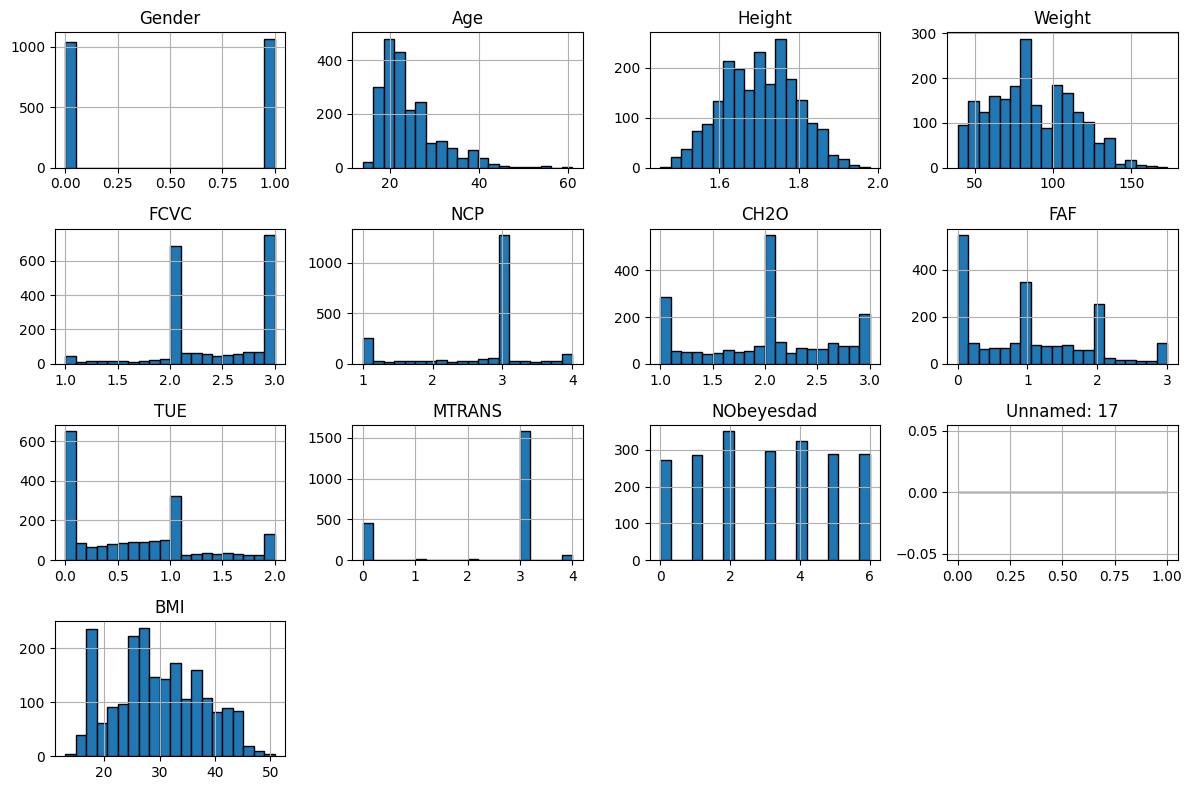

In [398]:

#Histogram for Numerical Features
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()



This code creates a boxplot to visualize potential outliers in the numerical features of your dataset.Boxplots (sns.boxplot) are used to identify potential outliers in numerical features. They visually represent the data's quartiles, median, and any points that fall significantly outside the typical range.

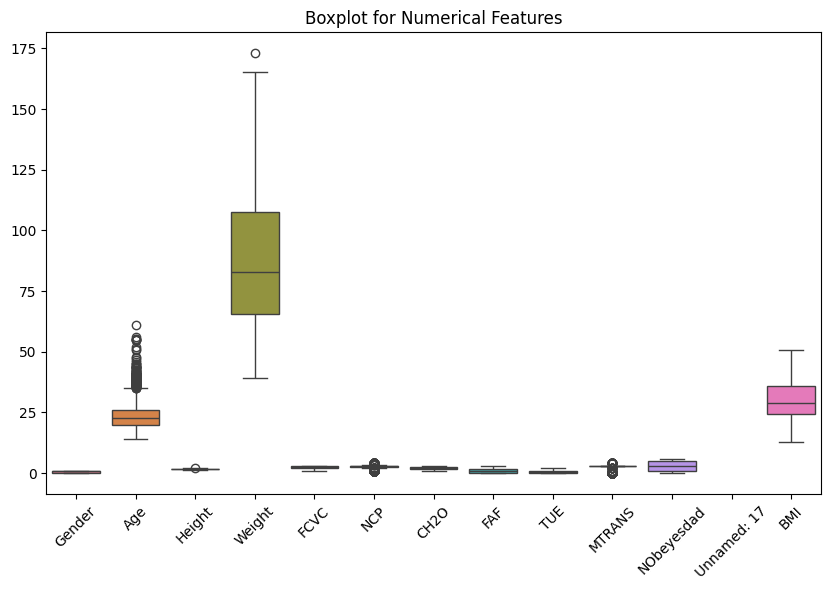

In [399]:
# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()





This code apples a logarithmetic transformation to the NCP and Agr columns of the dataset using np.log1p. It stores the transfored values back into the same column.

In [400]:
# Apply Log Transformation to reduce outliers
data["NCP"] = np.log1p(data["NCP"])
data["Age"] = np.log1p(data["Age"])


Boxplot is drawn again to visualize the impact of log1p in the dataset.

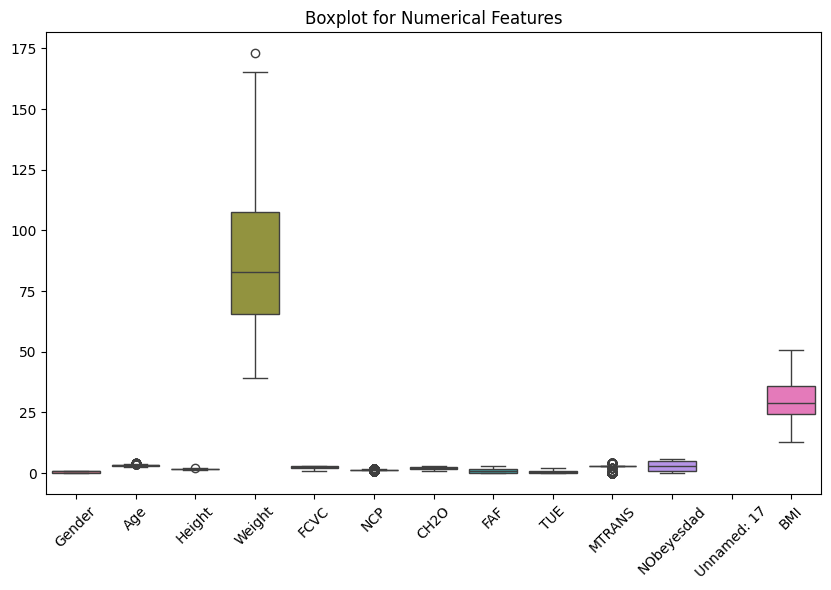

In [401]:
# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()



This code creates a countplot to visualize the
distribution of the 'Gender' category in your dataset.It helps in understanding the distribution of this categorical feature, identify potential biases, guide feature engineering, and gain insights into model performance.

<ipython-input-402-fd397e8a7188>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


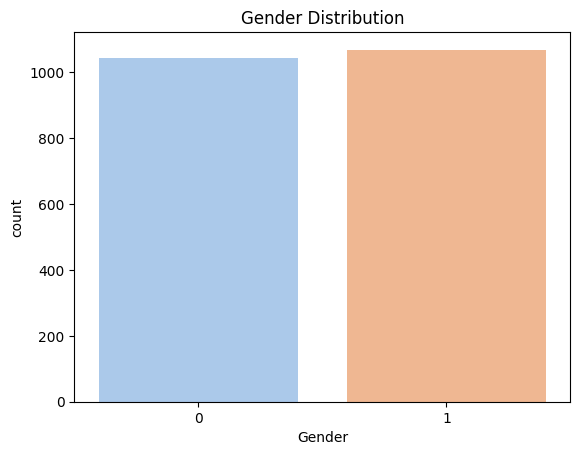

In [402]:

# Countplot for a Categorical Feature (Example: Gender)
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.show()


This countplot provides a valuable visualization of your target variable's distribution, allowing you to check for class imbalance, understand the overall distribution, and gain insights into your data, which are all crucial for effective data analysis and model building

<ipython-input-403-f505607f2040>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data, palette='Set2', order=data['NObeyesdad'].value_counts().index)


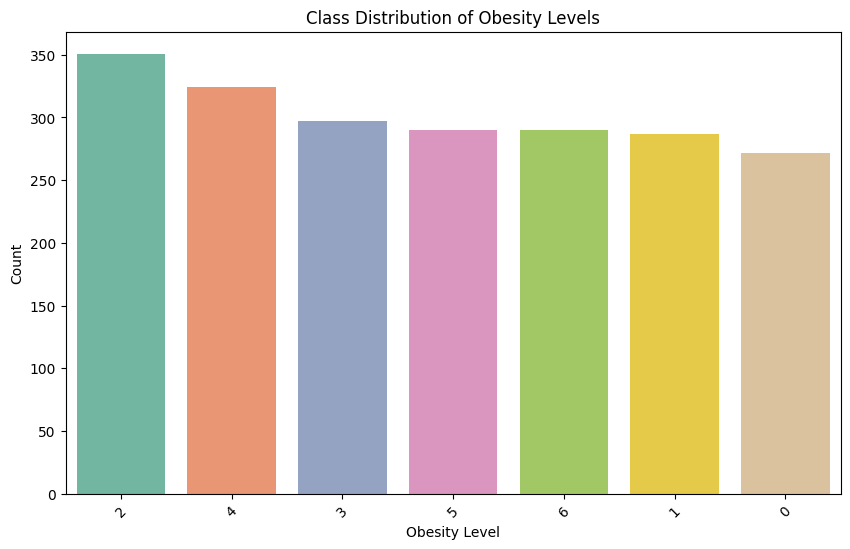

In [403]:
# Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=data, palette='Set2', order=data['NObeyesdad'].value_counts().index)
plt.title('Class Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This code is generating a correlation heatmap to visualize the relationships between the numerical features in your dataset. The correlation heatmap is a valuable tool for EDA as it allows you to quickly understand the relationships between your numerical features, identify potential issues like multicollinearity, and guide further analysis and model building.

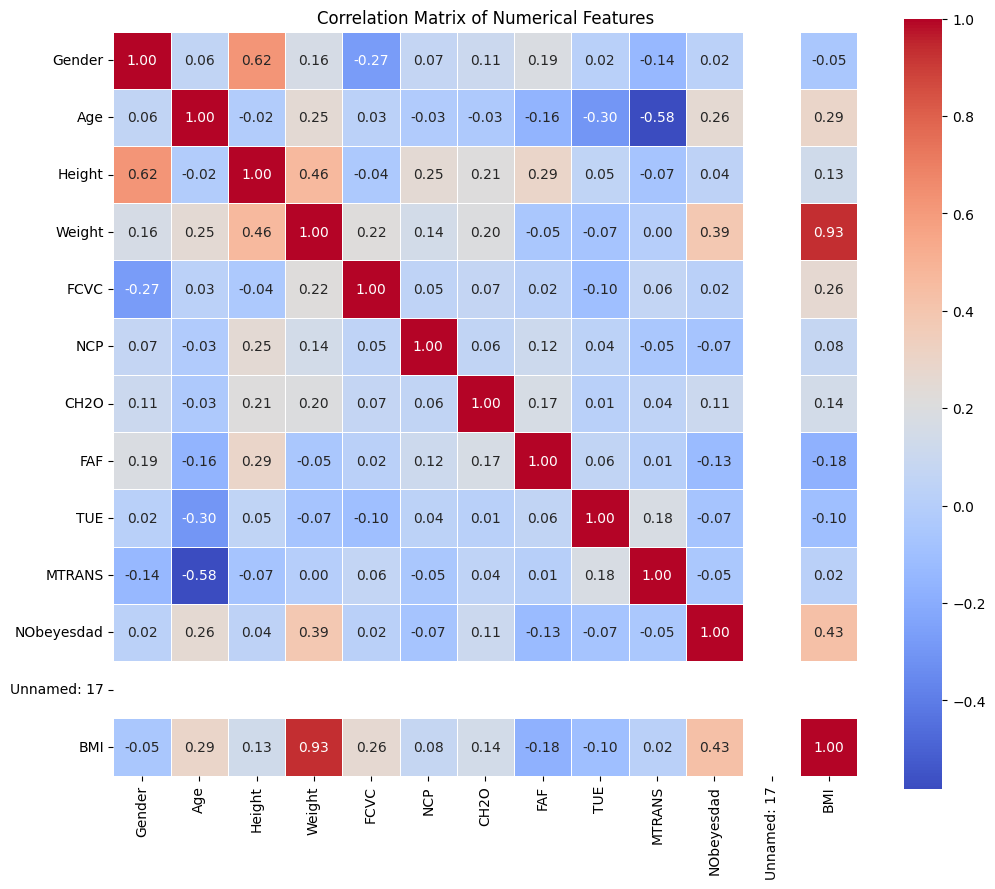

In [404]:

# Filter Numerical Features Only
numerical_data = data.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation heatmaps (sns.heatmap) display the correlations between numerical features, helping you identify relationships between variables.

# **Data Cleaning:**

In [405]:
# Drop unnecessary columns (if any)
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Handle Missing Values (forward fill)
data.fillna(method='ffill', inplace=True)

# Label Encoding for Categorical Features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature and Target Split
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Train-Test Split Function
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split arrays or matrices into random train and test subsets.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The data to split.
    y : array-like, shape (n_samples,)
        The target variable to split.
    test_size : float, int, or None, optional (default=0.2)
        If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
        If int, represents the absolute number of test samples.
    random_state : int or None, optional (default=None)
        If int, random_state is the seed used by the random number generator; If None, the random number generator is the RandomState instance used by np.random.

    Returns:
    X_train, X_test, y_train, y_test : arrays
        The training and testing data and target variables.
    """
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]

    if isinstance(test_size, float):
        test_size = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform train-test split using the custom function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1689, 17)
X_test shape: (422, 17)
y_train shape: (1689,)
y_test shape: (422,)


<ipython-input-405-34c9b43bd677>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# **4. Classification Task:**
-------------------------------------
----------------------------------------------

# Logistic Regression from scratch:



In [406]:
import numpy as np

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    clipped_probs = np.clip(y_pred, 1e-10, 1.0)
    log_likelihood = -np.log(clipped_probs[range(m), y_true])
    return np.sum(log_likelihood) / m

# Gradient Computation
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    num_classes = y_pred.shape[1]
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y_true] = 1

    error = y_pred - y_one_hot
    dw = np.dot(X.T, error) / m
    db = np.sum(error, axis=0, keepdims=True) / m

    return dw, db

# Model Training
def train_model(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    num_classes = np.unique(y).size

    weights = np.zeros((n, num_classes))
    bias = np.zeros((1, num_classes))

    for i in range(num_iterations):
        logits = np.dot(X, weights) + bias
        probs = softmax(logits)

        dw, db = compute_gradients(X, y, probs)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            loss = cross_entropy_loss(y, probs)
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return weights, bias

# Prediction
def predict(X, weights, bias):
    logits = np.dot(X, weights) + bias
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    precision = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_true == 1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
# Train Logistic Regression Model
weights, bias = train_model(X_train, y_train, learning_rate=0.1, num_iterations=1000)
# Predict on Train and Test Sets
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

# Evaluate on Training Set
print("\nLogistic Regression (Scratch) Evaluation on Training Set:")
evaluate_model(y_train, y_pred_train)

# Evaluate on Test Set
print("\nLogistic Regression (Scratch) Evaluation on Test Set:")
evaluate_model(y_test, y_pred_test)

Iteration 0, Loss: 1.9459
Iteration 100, Loss: 0.9752
Iteration 200, Loss: 0.8494
Iteration 300, Loss: 0.7834
Iteration 400, Loss: 0.7384
Iteration 500, Loss: 0.7042
Iteration 600, Loss: 0.6766
Iteration 700, Loss: 0.6536
Iteration 800, Loss: 0.6338
Iteration 900, Loss: 0.6165

Logistic Regression (Scratch) Evaluation on Training Set:
Accuracy: 0.8176
Precision: 0.7647
Recall: 0.5200
F1 Score: 0.6190

Logistic Regression (Scratch) Evaluation on Test Set:
Accuracy: 0.7749
Precision: 0.7576
Recall: 0.4032
F1 Score: 0.5263


This code implements a basic Logistic Regression model using NumPy operations. It covers the core steps of model training, prediction, and evaluation.

# Decision Tree:

In [407]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on training data
y_pred_train_dt = dt_model.predict(X_train)

# Predictions on testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluation on training data
print("\nDecision Tree Train Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_dt))

# Evaluation on testing data
print("\nDecision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_dt))


Decision Tree Train Accuracy: 0.9869745411486086
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.98      1.00      0.99       225
           2       0.99      0.99      0.99       273
           3       0.99      1.00      0.99       239
           4       1.00      1.00      1.00       261
           5       0.99      0.94      0.97       234
           6       0.96      0.98      0.97       241

    accuracy                           0.99      1689
   macro avg       0.99      0.99      0.99      1689
weighted avg       0.99      0.99      0.99      1689


Decision Tree Test Accuracy: 0.9620853080568721
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.91      0.97      0.94        62
           2       1.00      0.96      0.98        78
           3       0.95 

 this code snippet builds a Decision Tree model, trains it on your data, makes predictions, and then evaluates its performance using standard classification metrics.

# KNN Algorithm:

In [408]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions on training data
y_pred_train_knn = knn_model.predict(X_train)

# Predictions on testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluation on training data
print("\nKNN Train Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_knn))

# Evaluation on testing data
print("\nKNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_knn))



KNN Train Accuracy: 0.886915334517466
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       216
           1       0.75      0.64      0.69       225
           2       0.90      0.96      0.93       273
           3       0.97      0.98      0.98       239
           4       1.00      0.99      1.00       261
           5       0.83      0.82      0.82       234
           6       0.89      0.85      0.87       241

    accuracy                           0.89      1689
   macro avg       0.88      0.88      0.88      1689
weighted avg       0.88      0.89      0.88      1689


KNN Test Accuracy: 0.8412322274881516
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        56
           1       0.68      0.48      0.57        62
           2       0.90      0.92      0.91        78
           3       0.95      0.98      0.97  

This code snippet builds a KNN model, trains it on your data, makes predictions, and then evaluates its performance using standard classification metrics

# **Hyperparameter Tuning for Decision Tree:**

In [409]:
# Hyperparameter tuning for Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)
rand_dt = RandomizedSearchCV(dt_model, param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
print("\nBest Params for Decision Tree:", rand_dt.best_params_)
best_dt = rand_dt.best_estimator_




Best Params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}


This code performs a randomized search to find the best hyperparameters for your Decision Tree classifier, aiming to improve its accuracy on your obesity classification task.

# **Hyperparameter Tuning for KNN Algorithm:**

In [410]:

# Hyperparameter tuning for KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}

knn_model = KNeighborsClassifier()
rand_knn = RandomizedSearchCV(knn_model, param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_knn.fit(X_train, y_train)

# Best parameters for KNN
print("\nBest Params for KNN:", rand_knn.best_params_)
best_knn = rand_knn.best_estimator_




Best Params for KNN: {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 60, 'algorithm': 'ball_tree'}


 This code performs a randomized search to find the best hyperparameters for your KNN classifier, aiming to improve its accuracy on your obesity classification task.

# **Feature Selection for Decision Tree:**

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features and target variable for obesity dataset
features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'MTRANS']  # Your features
X = data[features]
y = data['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)



Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'FCVC']


This code aims to identify the most important features for predicting the target variable ('NObeyesdad') and prepares the data for model training by selecting a subset of relevant features

# **Feature Selection for KNN ALgorithm:**

In [412]:
# Define features and target variable for obesity dataset
features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'MTRANS']  # Your features
X = data[features]
y = data['NObeyesdad']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)



Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'FCVC']


This code aims to identify the most important features for predicting the target variable ('NObeyesdad') when using a KNN classifier and prepares the data for model training by selecting a subset of relevant features.

# **Final Model for Classification:**

In [413]:

# Best hyperparameters from Decision Tree tuning
best_dt_params = {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5}

# Create and train the final Decision Tree model
final_dt_model = DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    min_samples_leaf=best_dt_params['min_samples_leaf'],
    random_state=42
)
final_dt_model.fit(X_train_selected, y_train)

# Predictions on training data
y_pred_train_dt = final_dt_model.predict(X_train_selected)

# Predictions on testing data
y_pred_dt = final_dt_model.predict(X_test_selected)

# Evaluation on training data
print("\nFinal Decision Tree Train Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_dt))

# Evaluation on testing data
print("\nFinal Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))






Final Decision Tree Train Accuracy: 0.9804502369668247
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.97      0.98      0.98       225
           2       0.97      0.99      0.98       273
           3       0.99      0.98      0.98       239
           4       1.00      1.00      1.00       261
           5       0.96      0.96      0.96       234
           6       0.98      0.97      0.97       240

    accuracy                           0.98      1688
   macro avg       0.98      0.98      0.98      1688
weighted avg       0.98      0.98      0.98      1688


Final Decision Tree Test Accuracy: 0.9456264775413712
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.98      0.87      0.92        62
           2       0.95      0.94      0.94        78
           3

This code creates your final Decision Tree model using the best hyperparameters, trains it on the training data with selected features, makes predictions on the test data, and evaluates its performance using various metrics.

# **Regression Task:**

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

This code imports the necessary tools for data handling, visualization, model building (Decision Tree and Random Forest regression), hyperparameter tuning, feature scaling, feature selection, and model evaluation using the R-squared metric.

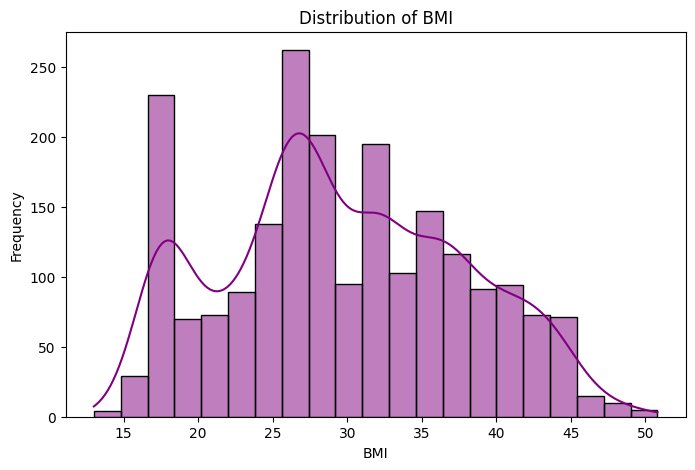

In [415]:
# Target Variable Distribution (For Regression)
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], kde=True, color='purple')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


This code visualizes the distribution of your target variable ('BMI') using a histogram and KDE plot, providing valuable insights for your regression analysis.

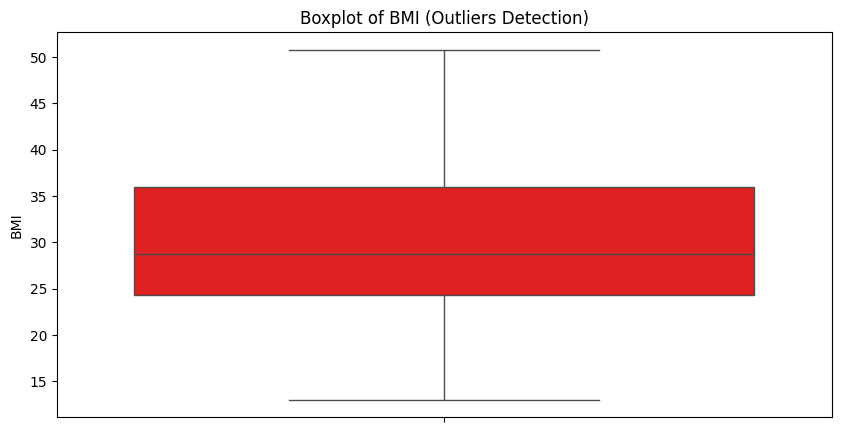

In [416]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data["BMI"], color='red')
plt.title("Boxplot of BMI (Outliers Detection)")
plt.show()


This code creates a boxplot of the 'BMI' column, which helps visualize the distribution of BMI values and identify any potential outliers in your dataset.

# Linerar Regression from Scratch:

In [417]:
# Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.001, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01  # Small random initialization
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Check for NaN values in gradients
            if np.isnan(dw).any() or np.isnan(db):
                print("NaN values encountered in gradients. Stopping training.")
                break

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Final Portfolio/Obesity_dataset.csv')

# Drop unnecessary columns (if any)
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col], errors='ignore')

# Handle Missing Values (forward fill)
data.fillna(method='ffill', inplace=True)

# Label Encoding for Categorical Features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature and Target Split for Regression
X = data.drop('BMI', axis=1)
y = data['BMI']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=5)  # Select the top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train and evaluate Linear Regression from Scratch
lin_reg = LinearRegressionScratch(learning_rate=0.001, epochs=5000)
lin_reg.fit(X_train_selected, y_train)

# Predictions on Training Set
y_pred_train_lr = lin_reg.predict(X_train_selected)

# Predictions on Test Set
y_pred_test_lr = lin_reg.predict(X_test_selected)

# Check for NaN values in predictions
if np.isnan(y_pred_train_lr).any() or np.isnan(y_pred_test_lr).any():
    print("NaN values encountered in predictions.")

# Evaluation Metrics
print("\nLinear Regression (Scratch) Evaluation on Training Set:")
print("R² Score:", r2_score(y_train, y_pred_train_lr))

print("\nLinear Regression (Scratch) Evaluation on Test Set:")
print("R² Score:", r2_score(y_test, y_pred_test_lr))

<ipython-input-417-90dec9a4f9fd>:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Linear Regression (Scratch) Evaluation on Training Set:
R² Score: 0.8828987787261796

Linear Regression (Scratch) Evaluation on Test Set:
R² Score: 0.881358450003546


This code implements a basic Linear Regression model from scratch and applies it to your dataset for a regression task. It covers data preprocessing, model training, prediction, and evaluation using the R-squared metric. The R-squared score provides a measure of how well the model fits the data, with higher values indicating a better fit.

# **Decision Tree for Regression**

In [418]:
# Decision Tree Regression with Pruning
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=2, min_samples_split=10, min_samples_leaf=5, ccp_alpha=0.3)
dt_reg.fit(X_train_selected, y_train)

# Predictions on training data
y_pred_train_dt = dt_reg.predict(X_train_selected)
# Predictions on testing data
y_pred_dt = dt_reg.predict(X_test_selected)

# Evaluation on training data
print("Decision Tree Regression Train R² Score:", r2_score(y_train, y_pred_train_dt))
# Evaluation on testing data
print("Decision Tree Regression Test R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regression Train R² Score: 0.8889748962039732
Decision Tree Regression Test R² Score: 0.877474955483156


This code snippet builds a Decision Tree Regressor with pruning, trains it on your data, makes predictions, and evaluates its performance using the R-squared score

# **Random Forest for Regression:**

In [419]:
# Random Forest Regression with Reduced Complexity
rf_reg = RandomForestRegressor(n_estimators=5, random_state=42, max_depth=2, min_samples_split=10, min_samples_leaf=5)
rf_reg.fit(X_train_selected, y_train)

# Predictions on training data
y_pred_train_rf = rf_reg.predict(X_train_selected)
# Predictions on testing data
y_pred_rf = rf_reg.predict(X_test_selected)

# Evaluation on training data
print("Random Forest Regression Train R² Score:", r2_score(y_train, y_pred_train_rf))
# Evaluation on testing data
print("Random Forest Regression Test R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Regression Train R² Score: 0.8915807804308373
Random Forest Regression Test R² Score: 0.8830963421660153


This code trains a Random Forest Regressor with reduced complexity, makes predictions on the test data, and evaluates its performance using the R-squared score.

# **Hyperparameter tuning for Decision Tree Regression:**

In [420]:

# Hyperparameter Tuning for Decision Tree
param_dist_dt = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'ccp_alpha': [0.2, 0.3, 0.4]
}
rand_dt = RandomizedSearchCV(dt_reg, param_dist_dt, cv=5, scoring='r2', n_iter=10, random_state=42, n_jobs=-1)
rand_dt.fit(X_train_selected, y_train)
print("Best Params for Decision Tree:", rand_dt.best_params_)
print("Best R² Score (Decision Tree):", rand_dt.best_score_)


Best Params for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 3, 'ccp_alpha': 0.3}
Best R² Score (Decision Tree): 0.9605219351425273


 This code performs hyperparameter tuning for your Decision Tree Regressor to find the optimal hyperparameter values that maximize the R-squared score.

# **Hyperparameter Tuning for Random Forest Regression**

In [421]:

# Hyperparameter Tuning for Random Forest
param_dist_rf = {
    'n_estimators': [5, 10],
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}
rand_rf = RandomizedSearchCV(rf_reg, param_dist_rf, cv=5, scoring='r2', n_iter=10, random_state=42, n_jobs=-1)
rand_rf.fit(X_train_selected, y_train)
print("Best Params for Random Forest:", rand_rf.best_params_)
print("Best R² Score (Random Forest):", rand_rf.best_score_)



Best Params for Random Forest: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 3}
Best R² Score (Random Forest): 0.9621492173923352


This code performs hyperparameter tuning for your Random Forest Regressor to find the optimal hyperparameter values that maximize the R-squared score.

# **Feature Selection:**

In [422]:

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=2)  # Reduce the number of features to 2
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: ['Weight', 'family_history_with_overweight']


This code identifies the 2 most relevant features for predicting the target variable in your regression task and prepares the data for model training by selecting those features

# **Final Model for Regression:**

In [423]:
# Train Best Models
best_rf = RandomForestRegressor(**rand_rf.best_params_, random_state=42)
best_rf.fit(X_train_selected, y_train)

# Make Predictions
y_pred_rf_best_train = best_rf.predict(X_train_selected)
y_pred_rf_best = best_rf.predict(X_test_selected)

# Evaluate Models
rf_r2_train = r2_score(y_train, y_pred_rf_best_train)
rf_r2 = r2_score(y_test, y_pred_rf_best)
# Compare and Select Best Model (based on testing data)
models = {"Random Forest": rf_r2}
best_model = max(models, key=models.get)

# Print Final Results
print(f"Random Forest Train R² Score: {rf_r2_train:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Best Model: {best_model} with R² Score: {models[best_model]:.4f}")

Random Forest Train R² Score: 0.9005
Random Forest R² Score: 0.8891
Best Model: Random Forest with R² Score: 0.8891


This code trains and evaluates your final Random
Forest Regressor model using the best hyperparameters,
makes predictions on the test data, and reports the model's performance using the R-squared score.



---


# **THANK YOU**

---

